In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Libraries and imports



In [ ]:
!pip install keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
  

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install vit_keras

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=3994618793893a1db97b7f6f09bea12295b07077316eed13755c8f19db85cf53
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import string
import re
import matplotlib.pyplot as plt
import keras.backend as K
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from vit_keras import vit
import tensorflow_addons as tfa

tfk = tf.keras
tfkl = tf.keras.layers
tf.config.optimizer.set_jit(True)
strategy = tf.distribute.get_strategy()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Random seed for reproducibility

In [ ]:
seed = 21
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Mixed precision


In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
  tpu = None

if tpu:
  policyConfig = 'mixed_bfloat16'
else:
  policyConfig = 'mixed_float16'
policy = tf.keras.mixed_precision.Policy(policyConfig)
tf.keras.mixed_precision.set_global_policy(policy)

# Load paths of the images

In [ ]:
!unzip "/gdrive/My Drive/train2014_128.zip"

Output streaming troncato alle ultime 5000 righe.
  inflating: train2014_128/COCO_train2014_000000547307.jpg  
  inflating: train2014_128/COCO_train2014_000000547308.jpg  
  inflating: train2014_128/COCO_train2014_000000547315.jpg  
  inflating: train2014_128/COCO_train2014_000000547318.jpg  
  inflating: train2014_128/COCO_train2014_000000547348.jpg  
  inflating: train2014_128/COCO_train2014_000000547351.jpg  
  inflating: train2014_128/COCO_train2014_000000547352.jpg  
  inflating: train2014_128/COCO_train2014_000000547363.jpg  
  inflating: train2014_128/COCO_train2014_000000547367.jpg  
  inflating: train2014_128/COCO_train2014_000000547369.jpg  
  inflating: train2014_128/COCO_train2014_000000547378.jpg  
  inflating: train2014_128/COCO_train2014_000000547387.jpg  
  inflating: train2014_128/COCO_train2014_000000547388.jpg  
  inflating: train2014_128/COCO_train2014_000000547391.jpg  
  inflating: train2014_128/COCO_train2014_000000547411.jpg  
  inflating: train2014_128/COCO_tra

# Parameters

In [ ]:
# Parameters
total_data = 414113  # 414113
num_val_samples = int(0.15 * total_data)
num_train_samples = total_data - 2 * num_val_samples

batch_size = 32
learning_rate = 1.0e-5
temperature = 1.0725
l2 = 1.0e-3
image_shape = (128, 128, 3)

projection = 768

import json

# Apri il file JSON in modalità di lettura

with open('/gdrive/My Drive/captions_train2014.json', 'r') as file:
    json = json.load(file)

name_images = []
captions = []
desired_length = 12
path_folder_images = "/content/train2014_128/COCO_train2014_"
image_extension = ".jpg"
annotations = json['annotations']
for t in annotations:
    name_images.append(str(t["image_id"]).zfill(desired_length))
    captions.append(t["caption"])

name_images = list(map(lambda x: path_folder_images + x + image_extension, name_images))


In [ ]:
sorted_indices = np.arange(len(captions))
np.random.shuffle(sorted_indices)
captions = np.array(captions)[sorted_indices]
name_images = np.array(name_images)[sorted_indices]

# Train, Validation & Test Dataset

In [ ]:
def load_image(name_image, caption):
    image = tf.io.read_file(name_image)
    image = tf.image.decode_jpeg(image, channels=image_shape[2])
    image /= 255
    return image, caption

def make_dataset(name_images, captions):
    return tf.data.Dataset.from_tensor_slices((name_images, captions)) \
        .map(load_image) \
        .shuffle(2048, reshuffle_each_iteration=True, seed=seed) \
        .batch(batch_size, drop_remainder=True) \
        .prefetch(tf.data.AUTOTUNE) \

train_ds = make_dataset(name_images[:num_train_samples], captions[:num_train_samples])
val_ds = make_dataset(name_images[num_train_samples:num_train_samples + num_val_samples],
                      captions[num_train_samples:num_train_samples + num_val_samples])
test_ds = make_dataset(name_images[num_train_samples + num_val_samples:num_train_samples + num_val_samples+100],
                       captions[num_train_samples + num_val_samples:num_train_samples + num_val_samples+100])

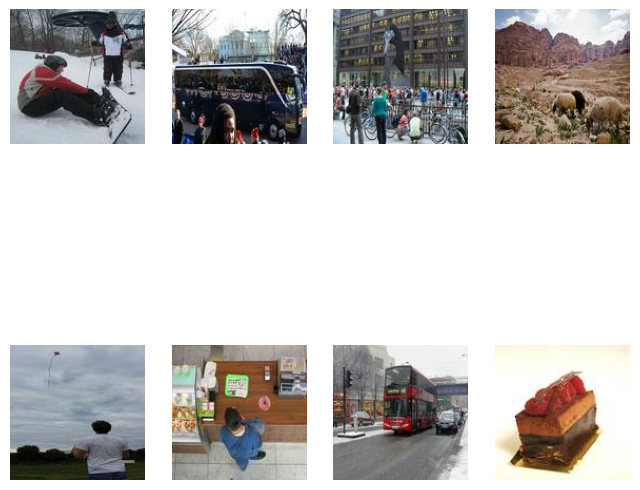

In [ ]:
for i,o in train_ds.take(1):
  plt.figure(figsize=(8, 8))
  for index in range(8):
      plt.subplot(2, 4, index+1)
      plt.imshow(i[index], cmap='gray')
      plt.axis('off')

  plt.show()

# Bert encoder


In [ ]:
!pip install tensorflow-text

In [ ]:
!pip install --upgrade tensorflow-hub

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as tftx

def create_text_encoder():

    # Receive the text as inputs.
    inputs = tfkl.Input(shape=(), dtype=tf.string)

    preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    encoder_inputs = preprocessor(inputs)
    encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2",
    trainable=True)
    bert_out = encoder(encoder_inputs)
    caption_projections = tfkl.Dense(projection, kernel_regularizer=tf.keras.regularizers.L2(l2))(bert_out["pooled_output"])

    caption_outputs = tfkl.LayerNormalization(epsilon=1e-6)(caption_projections)

    # Create the text encoder model.
    return tfk.Model(inputs, caption_outputs, name="text_encoder")

In [ ]:
caption_encoder=create_text_encoder()

# Image Encoder


In [ ]:
#image_inputs = tfkl.Input(shape=(None, None, 3), name="image_inputs")
#resNet50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=image_inputs, pooling='avg')
#image_feature = resNet50.output
#image_projection = tfkl.Dense(projection, kernel_regularizer=tf.keras.regularizers.L2(l2))(image_feature)

#image_encoder= tfk.Model(image_inputs, image_projection)

In [ ]:
from vit_keras import vit
vit_model = vit.vit_b32(
        image_size = image_shape[0],
        pretrained = True,
        include_top = False,
        pretrained_top = False)


image_encoder=tf.keras.Sequential([
    vit_model,
    tfkl.Dense(projection, kernel_regularizer=tf.keras.regularizers.L2(l2))
])

353253686/353253686 [==============================] - 7s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 4, 4
  warnings.warn(


# CLIP Model

In [ ]:
"""# CLIP Model"""

class Clip(tf.keras.Model):
    def __init__(self, caption_encoder, image_encoder, temperature=0.075, **kwargs):
        super(Clip, self).__init__(**kwargs)
        self.caption_encoder = caption_encoder
        self.image_encoder = image_encoder
        self.temperature = temperature
        self.loss_tracker = tf.keras.metrics.Mean(name="contrastive_loss")

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.loss_tracker]

    # Ensure second feature is text and first is image
    def call(self, features, training=False):
        # Get the embeddings for the images.
        image_embeddings = image_encoder(features[0], training=training)

        # Get the embeddings for the captions.
        caption_embeddings = caption_encoder(features[1], training=training)

        return caption_embeddings, image_embeddings

    def compute_loss(self, caption_embeddings, image_embeddings):

        # Compute pairwise cosine similarities
        logits = (tf.matmul(caption_embeddings, image_embeddings, transpose_b=True) / self.temperature)

        # Compute the loss for the images using cross-entropy
        images_loss = tf.keras.losses.categorical_crossentropy(tf.eye(batch_size), logits, from_logits=True, axis=0)

        # Compute the loss for the captions using cross-entropy
        captions_loss = tf.keras.losses.categorical_crossentropy(tf.eye(batch_size), logits, from_logits=True, axis=1)

        # Return the mean of the loss over the batch.
        loss = (captions_loss + images_loss) / 2

        return loss

    def train_step(self, data):
        # Start the scope of gradient
        with tf.GradientTape() as tape:
            # Forward pass
            caption_embeddings, image_embeddings = self(data, training=True)
            # Compute loss
            loss = self.compute_loss(caption_embeddings, image_embeddings)
            scaled_loss = optimizer.get_scaled_loss(loss)

        # Backward pass
        # Compute gradient
        gradients = tape.gradient(loss, self.trainable_variables)
        gradients = optimizer.get_unscaled_gradients(gradients)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # Monitor loss
        self.loss_tracker.update_state(loss)
        return {"contrastive_loss": self.loss_tracker.result()}

    def test_step(self, data):
        # Compute embeddings
        caption_embeddings, image_embeddings = self(data, training=False)
        # Compute loss
        loss = self.compute_loss(caption_embeddings, image_embeddings)
        scaled_loss = optimizer.get_scaled_loss(loss)

        # Monitor loss
        self.loss_tracker.update_state(loss)
        return {"contrastive_loss": self.loss_tracker.result()}



with strategy.scope():
    clip = Clip(caption_encoder, image_encoder, temperature=temperature)
#    clip.compile(tf.keras.
#        optimizer=tf.keras.optimizers.experimental.AdamW(learning_rate=learning_rate, weight_decay=weight_decay))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
    clip.compile(optimizer)

# Training and Testing

In [ ]:
class CustomDualSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, save_paths):
        super(CustomDualSaveCallback, self).__init__()
        self.save_paths = save_paths

    def on_epoch_end(self, epoch, logs=None):
        caption_encoder.save(self.save_paths[0].format(epoch=epoch))
        image_encoder.save(self.save_paths[1].format(epoch=epoch))

# Define paths for saving encoder weights
encoder1_save_path = '/gdrive/My Drive/test_caption_weights_epoch_{epoch}'
encoder2_save_path = '/gdrive/My Drive/test_image_weights_epoch_{epoch}'

# Create an instance of your custom callback
custom_callback = CustomDualSaveCallback( [encoder1_save_path, encoder2_save_path])

In [ ]:
"""# Training and Testing"""

# Train for up to N epochs
epochs = 20
# Create a learning rate scheduler callback.
lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_contrastive_loss", mode="min", factor=0.5, patience=3)

# Create an early stopping callback.
es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_contrastive_loss", mode="min", patience=2, restore_best_weights=True)

# Train the model
history = clip.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[lr_cb, es_cb, custom_callback] #callbacks=[lr_cb, es_cb, GCCallback()]
)

clip.evaluate(test_ds)


In [ ]:
 # summarize history for loss
plt.plot(history.history['contrastive_loss'])
plt.plot(history.history['val_contrastive_loss'])
plt.title('model contrastive loss')
plt.ylabel('contrastive loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()